In [28]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

Titanic training data, taken from Kaggle.com

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have a mixture of data types: text, numeric and categorical(eg. sex)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The non-numeric columns are dropped from satistical summary but if we pass only those to decribe then we can et a summary for them

In [10]:
text = df.dtypes[df.dtypes == "object"].index
text

Index([u'Name', u'Sex', u'Ticket', u'Cabin', u'Embarked'], dtype='object')

In [11]:
df[text].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


Note that the summary gives us the number of non-NAN values, number of unique categories in the column, the item that occurred the most frequent and also the number of times that item occured.

However, it does not give us any information on what the columns represent.

We can ask the following questions for the data:
1. Do we need all of the columns?
2. Do we need to transform any of the text/categorical columns?
3. Are there null values and how should we treat them?

Question 1:
    PassengerId does not give us any useful information since it is unique per row therefore we can delete it.

In [13]:
del df["PassengerId"]

In [14]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Let's look at the Name column

In [15]:
sorted(df["Name"])[0:20]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton',
 'Allen, Mr. William Henry',
 'Allison, Master. Hudson Trevor',
 'Allison, Miss. Helen Loraine',
 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
 'Allum, Mr. Owen George']

We can group Name by last name but we already have some columns with family relations therefore we can delete Name but first let's ook at what other columns we can drop as well.

Let's start with Ticket

In [18]:
df["Ticket"][0:20]

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [19]:
df["Ticket"].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

The number of unique values are almost the same as the number of rows therefore it is not a good categorical column and therefore would not be useful for predicitons. We can drop Ticket as well.

In [20]:
df.drop(['Name', 'Ticket'], axis=1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
5,0,3,male,NaN,0,0,8.4583,NaN,Q
6,0,1,male,54.0,0,0,51.8625,E46,S
7,0,3,male,2.0,3,1,21.0750,NaN,S
8,1,3,female,27.0,0,2,11.1333,NaN,S
9,1,2,female,14.0,1,0,30.0708,NaN,C


Question 2: Looking at the dataset we can see that Survived and Pclass are both categorical but in numeric form already so we don't change these. 

However, for demonstration purposes, let's change the names of the classes in Pclass

In [22]:
newClass = pd.Categorical(df["Pclass"], ordered=True)
newClass = newClass.rename_categories(["class1", "class2","class3"])
newClass.describe()

,counts,freqs
categories,,
class1,216,0.242424
class2,184,0.206510
class3,491,0.551066


In [23]:
df["Pclass"] = newClass

In [24]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,class3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,class3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,class3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We could do the opposite with categorical fields as well. For example, change the Sex attribute to numbers

In [30]:
sex_encoder = LabelEncoder()
df["Sex"] = sex_encoder.fit_transform(df["Sex"])

In [31]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,class3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,1,class3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0,class3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


Let's look at the Cabin column

In [32]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104', 'C111',
       'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30', 'D20',
       'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22', 'C86',
       'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20', 'D19',
       'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126', 'B71',
       'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',

Each section of thee ship is represented by a capital letter in the Cabin name, we can group bu these letters in order to make this column more useful

In [33]:
cabinStr = df["Cabin"].astype(str) #converts the data to str
newCabin = np.array([cabin[0] for cabin in cabinStr]) #Extract first letter
newCabin = pd.Categorical(newCabin)
df["Cabin"] = newCabin
df["Cabin"].describe()

count     891
unique      9
top         n
freq      687
Name: Cabin, dtype: object

In [34]:
newCabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


Question 3: Cabin has alot of missing data but cabin location may impact survival rate so we can keep it as is for now.

Age has missing data but instead of just getting rid of those rows (177 rows), let's instead keep them and replace the missing data with the mean value, but first let's look at the data for Age

In [36]:
missing = np.where(df["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888]),)

In [38]:
len(missing[0])

177

In [39]:
df.hist(column='Age', figsize=(15,10), bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0b47f4e590>]], dtype=object)

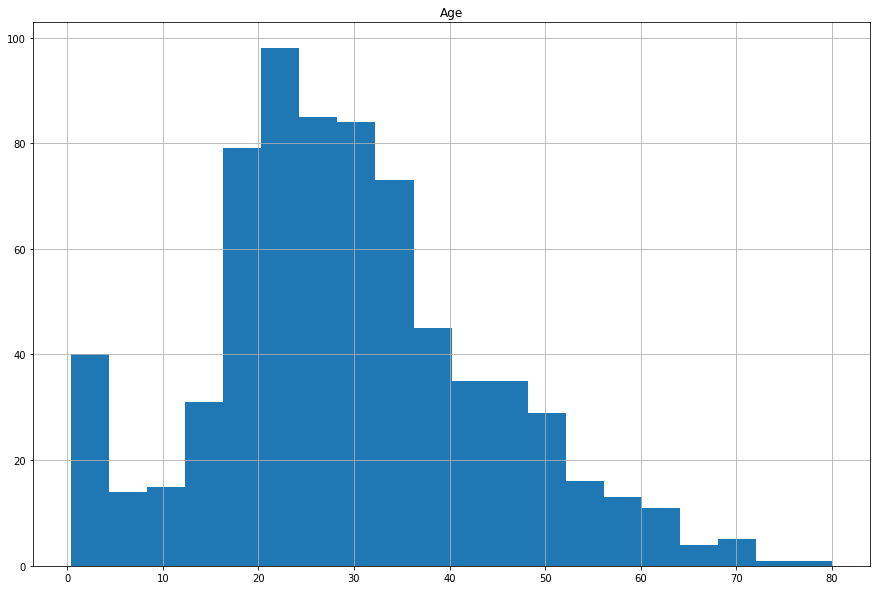

In [40]:
plt.show()

Replacing missing values with mean:

In [41]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

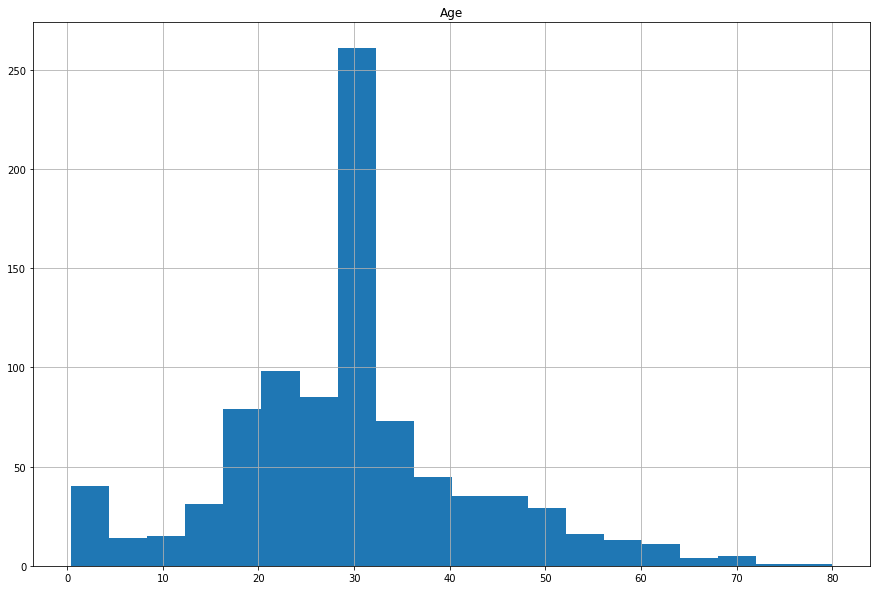

In [42]:
df.hist(column='Age', figsize=(15,10), bins=20)
plt.show()

Lets's look at the Faroutlierse column using a box plot. Box plots helps identify outliers

In [43]:
df["Fare"].plot(kind="box", figsize=(15,10))

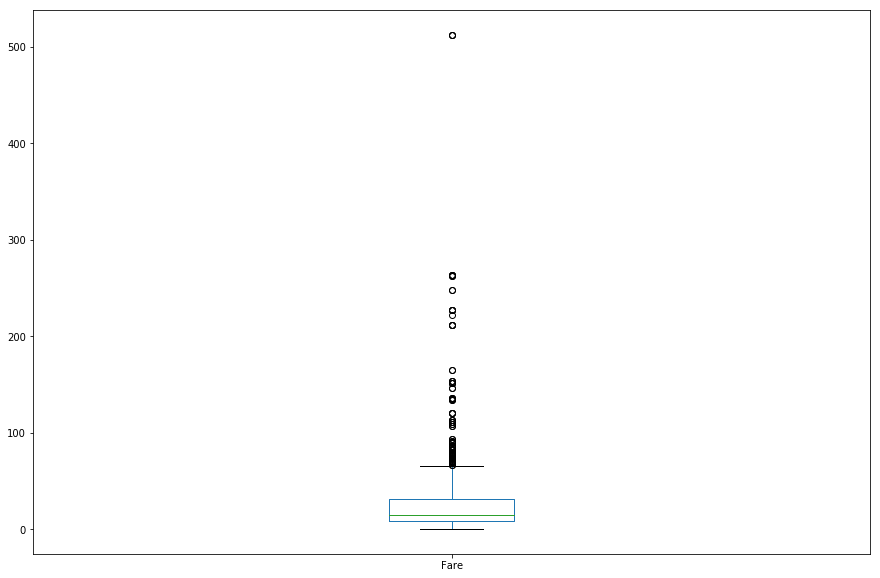

In [44]:
plt.show()

The box represents 50% of the data and the center bar represents the median. The dotted lines are known as "whiskers". The represent the majority of the data. Dots far away from these lines are outliers

In [46]:
highPrice = np.where(df["Fare"] == max(df["Fare"]))
df.loc[highPrice]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,1,class1,"Ward, Miss. Anna",0,35.0,0,0,PC 17755,512.3292,n,C
679,1,class1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,B,C
737,1,class1,"Lesurer, Mr. Gustave J",1,35.0,0,0,PC 17755,512.3292,B,C


Let's combine some columns to look at families on board

In [48]:
df["Family"] = df["SibSp"] + df["Parch"]

We can see whose family had the most passengers on board

In [51]:
largestFamily = np.where(df["Family"] == max(df["Family"]))
df.loc[largestFamily]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
159,0,class3,"Sage, Master. Thomas Henry",1,29.699118,8,2,CA. 2343,69.55,n,S,10
180,0,class3,"Sage, Miss. Constance Gladys",0,29.699118,8,2,CA. 2343,69.55,n,S,10
201,0,class3,"Sage, Mr. Frederick",1,29.699118,8,2,CA. 2343,69.55,n,S,10
324,0,class3,"Sage, Mr. George John Jr",1,29.699118,8,2,CA. 2343,69.55,n,S,10
792,0,class3,"Sage, Miss. Stella Anna",0,29.699118,8,2,CA. 2343,69.55,n,S,10
846,0,class3,"Sage, Mr. Douglas Bullen",1,29.699118,8,2,CA. 2343,69.55,n,S,10
863,0,class3,"Sage, Miss. Dorothy Edith ""Dolly""",0,29.699118,8,2,CA. 2343,69.55,n,S,10


Looking at the data, we see that there are 8 siblings and 2 parents in this family. We see 7 out of the 8 siblings here and they all died. The 8th person may be in the test dataset. Can you predict whether they survived or died?